In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
benchs_names_list = [['MMLU','ARC','HellaSwag','Winogrande','TruthfulQA','GSM8K'],
                     ['IFEval','BBH','MATH Lvl 5','GPQA','MUSR','MMLU-PRO'],
                     ['MMLU','ARC','HellaSwag','Winogrande','TruthfulQA','GSM8K','IFEval','BBH','MATH Lvl 5','GPQA','MUSR','MMLU-PRO']] 
methods_names = ['logSlogT_sigmoid', 'logSlogT_trainlink',
                 'factor_sigmoid_halves_d=2','factor_sigmoid_halves_d=3','factor_sigmoid_halves_d=4',
                 'factor_trainlink_halves_d=2','factor_trainlink_halves_d=3','factor_trainlink_halves_d=4',
                 'factor_sigmoid_d=2','factor_sigmoid_d=3','factor_sigmoid_d=4',
                 'factor_trainlink_d=2','factor_trainlink_d=3','factor_trainlink_d=4']
len(methods_names)

14

gold True select True


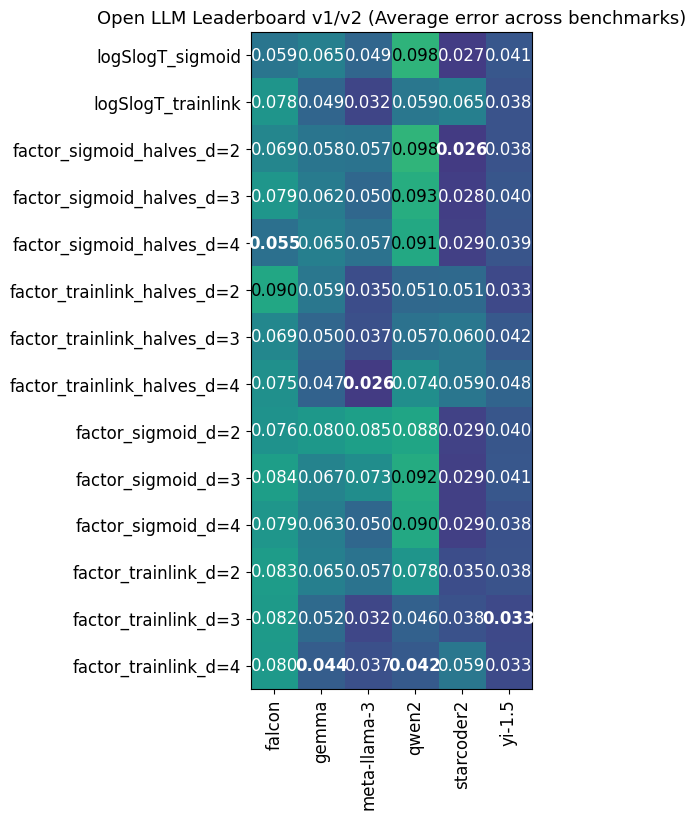

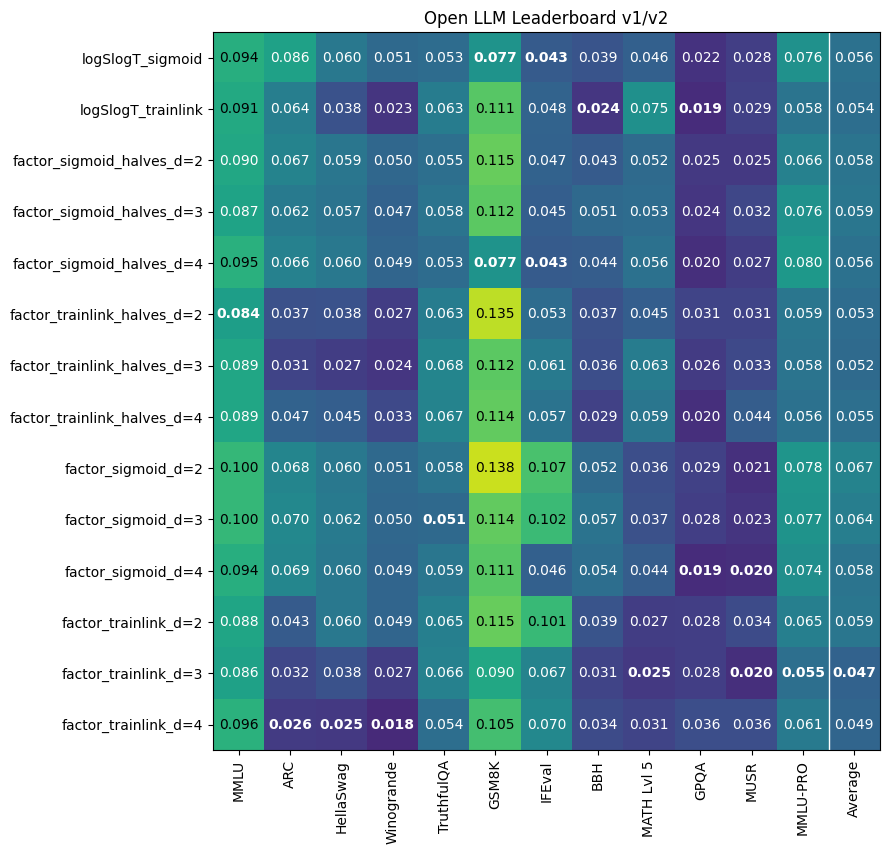

/tmp/ipykernel_99141/2601893073.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


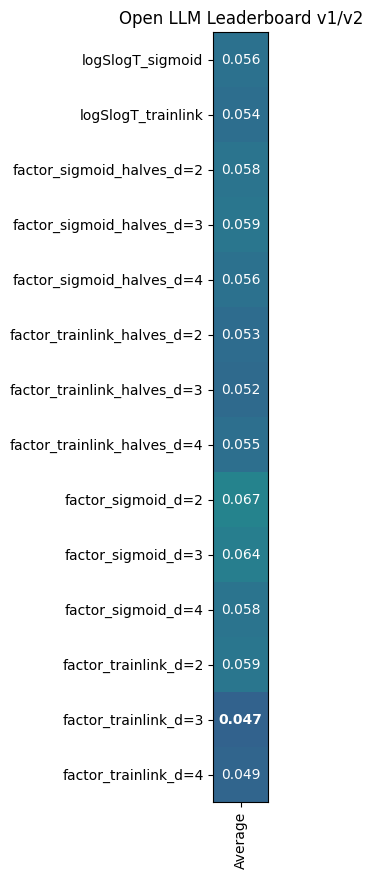

gold True select False


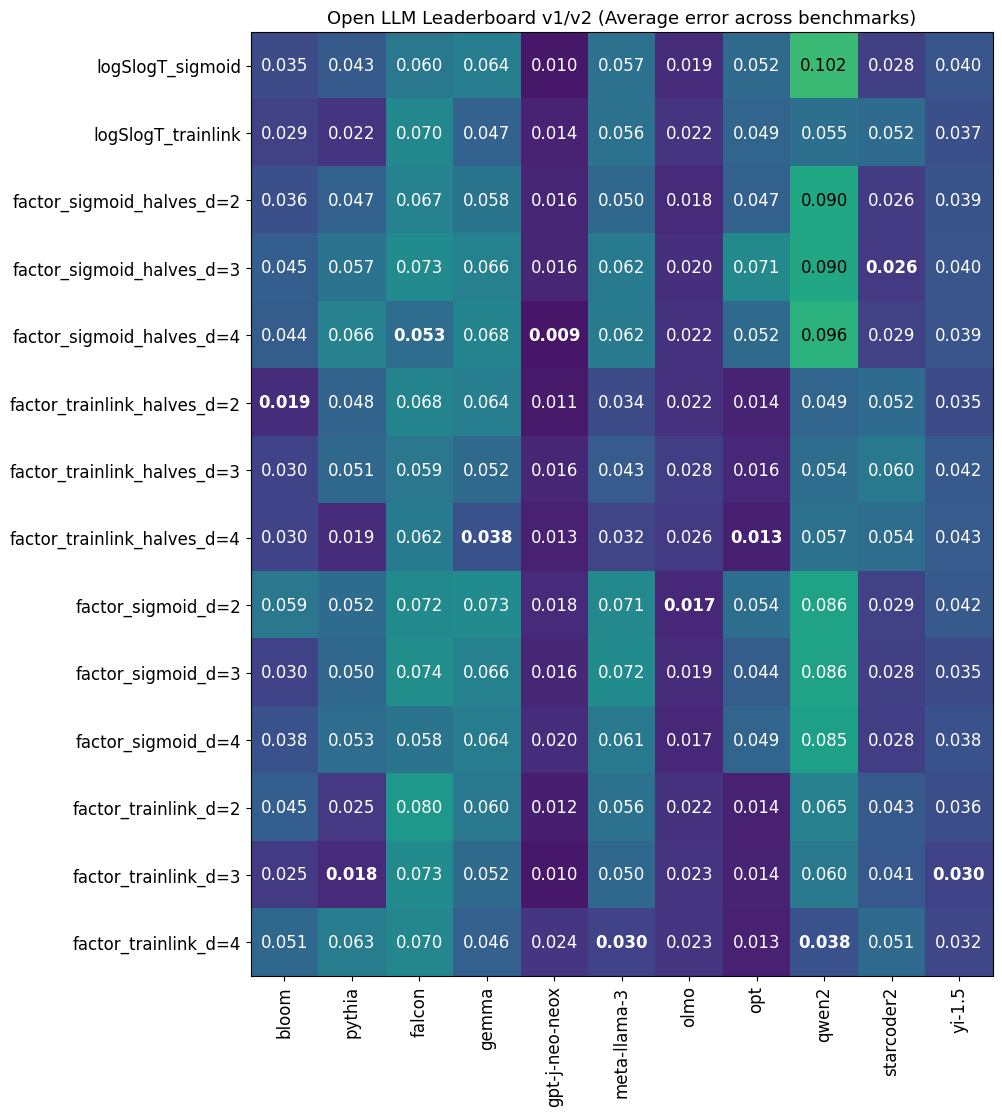

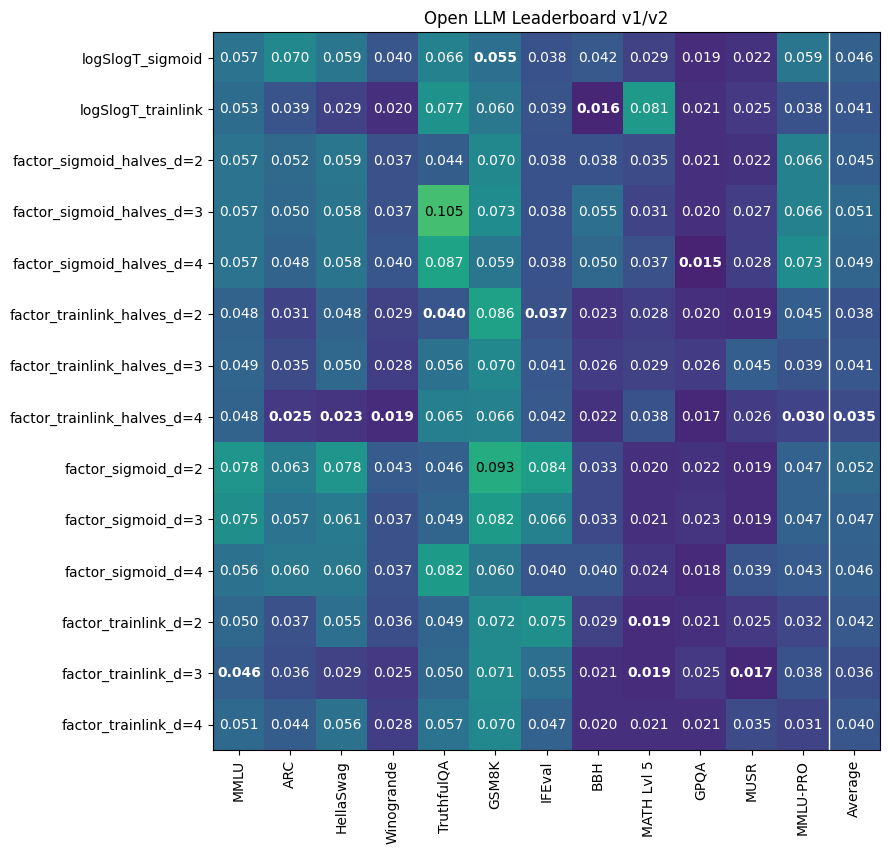

/tmp/ipykernel_99141/2601893073.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


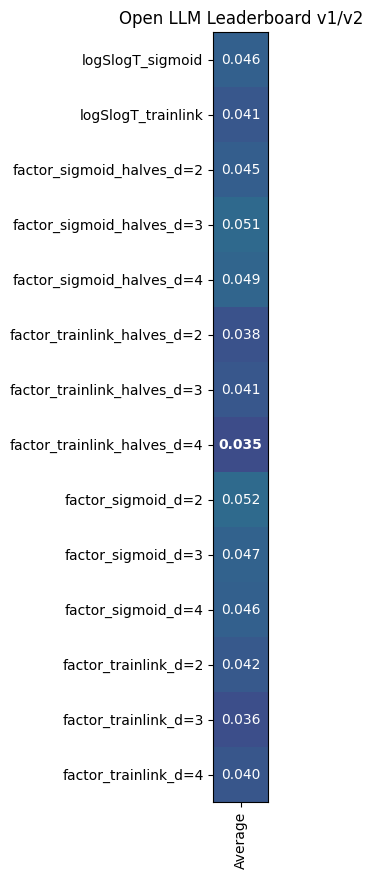

gold False select True


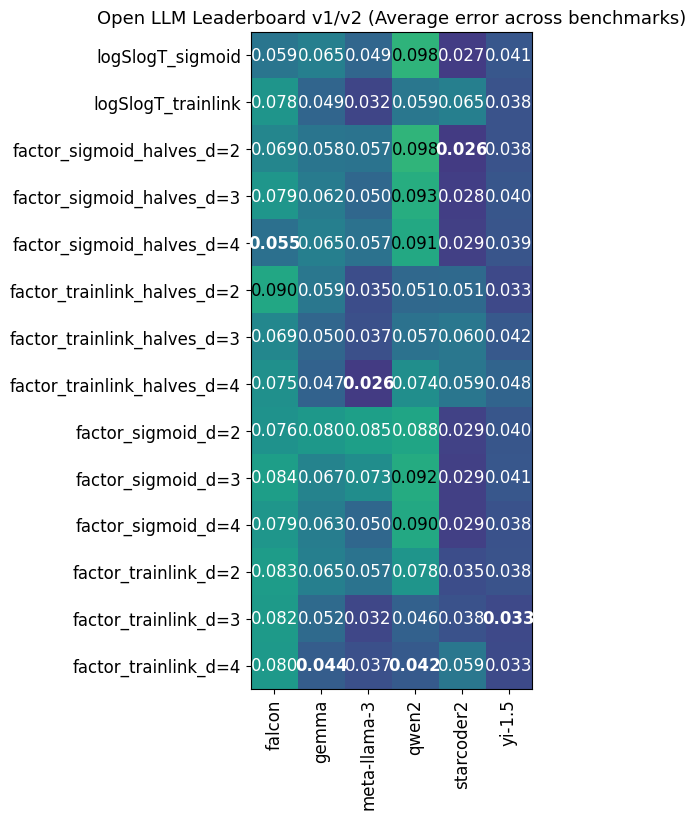

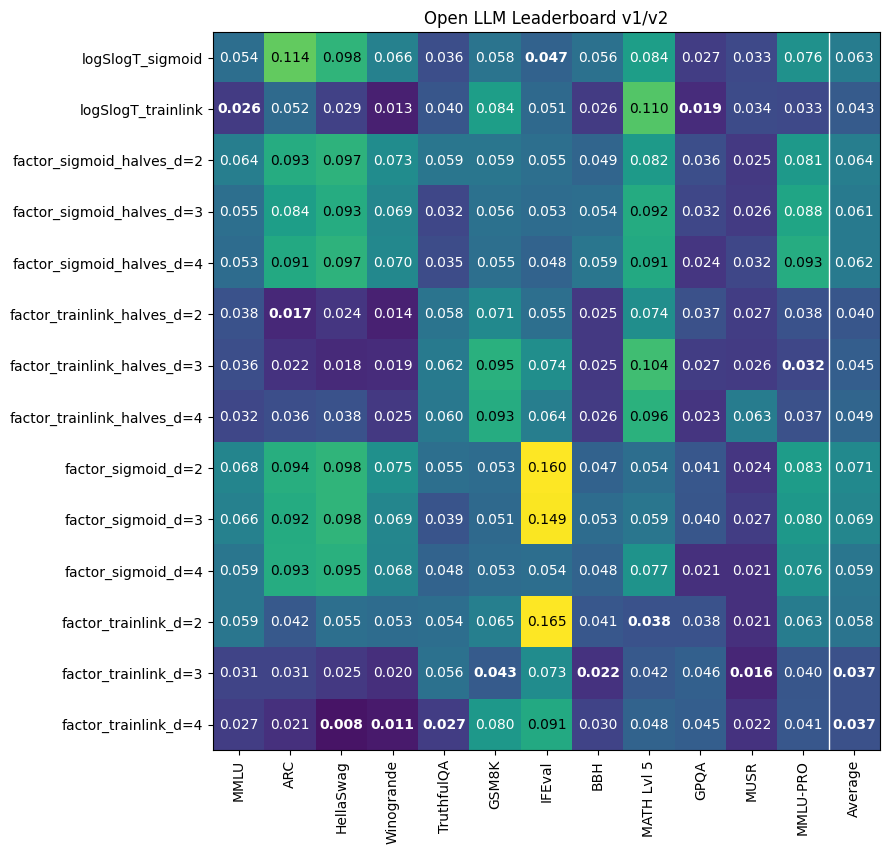

/tmp/ipykernel_99141/2601893073.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


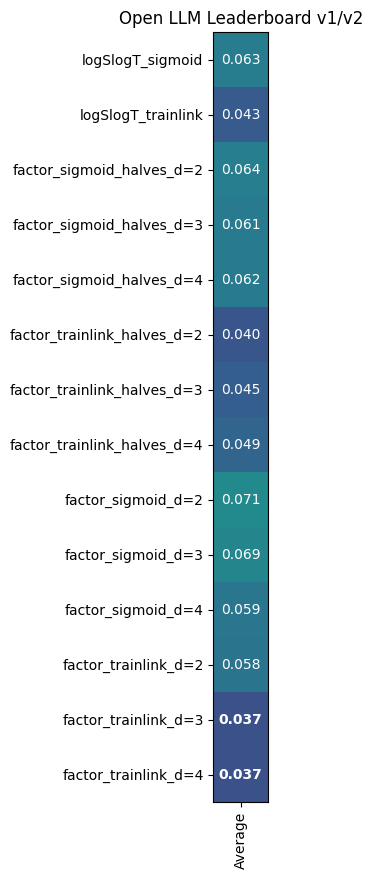

gold False select False


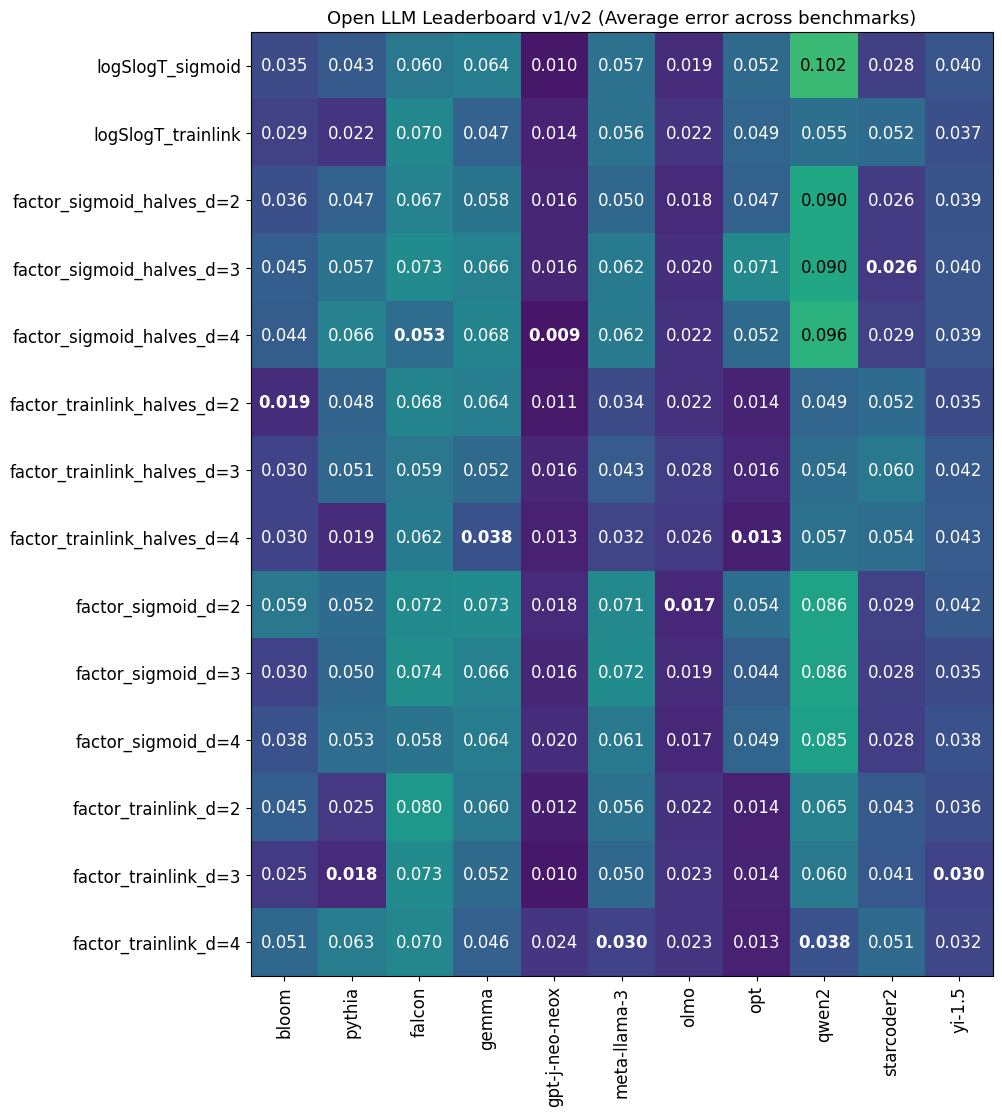

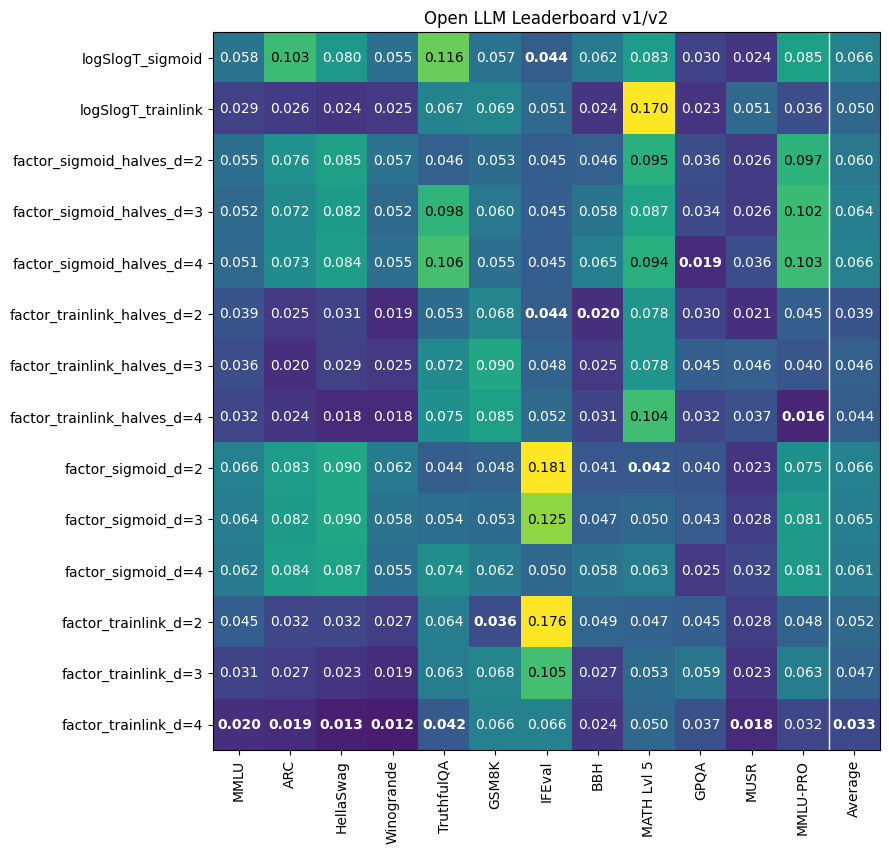

/tmp/ipykernel_99141/2601893073.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


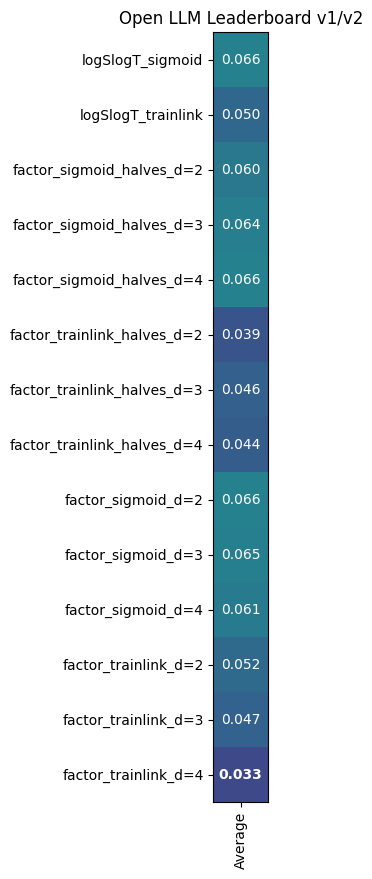

In [21]:
vmin=0
vmax=.15
median_value = 3*vmax/5

min_models = 2
t = min_models-1
rr = 2

if t==1:
    select = ['logSlogT_sigmoid', 'logSlogT_trainlink',
             'factor_sigmoid_halves_d=2','factor_sigmoid_halves_d=3','factor_sigmoid_halves_d=4',
             'factor_trainlink_halves_d=2','factor_trainlink_halves_d=3','factor_trainlink_halves_d=4',
             'factor_sigmoid_d=2','factor_sigmoid_d=3','factor_sigmoid_d=4',
             'factor_trainlink_d=2','factor_trainlink_d=3','factor_trainlink_d=4']
    
    names = ['logSlogT_sigmoid', 'logSlogT_trainlink',
             'factor_sigmoid_halves_d=2','factor_sigmoid_halves_d=3','factor_sigmoid_halves_d=4',
             'factor_trainlink_halves_d=2','factor_trainlink_halves_d=3','factor_trainlink_halves_d=4',
             'factor_sigmoid_d=2','factor_sigmoid_d=3','factor_sigmoid_d=4',
             'factor_trainlink_d=2','factor_trainlink_d=3','factor_trainlink_d=4']
else:
    select = ['logSlogT_sigmoid', 'logSlogT_trainlink',
             'factor_sigmoid_halves_d=2','factor_sigmoid_halves_d=3','factor_sigmoid_halves_d=4',
             'factor_trainlink_halves_d=2','factor_trainlink_halves_d=3','factor_trainlink_halves_d=4',
             'factor_sigmoid_d=2','factor_sigmoid_d=3','factor_sigmoid_d=4',
             'factor_trainlink_d=2','factor_trainlink_d=3','factor_trainlink_d=4']
    
    names = ['logSlogT_sigmoid', 'logSlogT_trainlink',
             'factor_sigmoid_halves_d=2','factor_sigmoid_halves_d=3','factor_sigmoid_halves_d=4',
             'factor_trainlink_halves_d=2','factor_trainlink_halves_d=3','factor_trainlink_halves_d=4',
             'factor_sigmoid_d=2','factor_sigmoid_d=3','factor_sigmoid_d=4',
             'factor_trainlink_d=2','factor_trainlink_d=3','factor_trainlink_d=4']

titles = ['Open LLM Leaderboard v1', 'Open LLM Leaderboard v2', 'Open LLM Leaderboard v1/v2']
select_ind = [m in select for m in methods_names] 

if t==1:
    gold_families_list = [[['meta-llama-3', 'meta-llama-3-instruct'],
                           ['qwen2'],
                           ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']],
                          [['gemma-2', 'gemma-2-it'],
                           ['meta-llama-3', 'meta-llama-3-instruct','llama-3-sauerkrautlm-instruct'],
                           ['qwen2','qwen2-instruct','dolphin-2.9.2-qwen2'],
                           ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']],
                          [['meta-llama-3', 'meta-llama-3-instruct'],
                           ['qwen2'],
                           ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']]]
else:
    gold_families_list = [[['llama-2', 'llama-2-chat'],
                          ['qwen2'],
                          ['yi-1.5', 'yi-1.5-chat']],
                          [['llama-2', 'llama-2-chat'],
                           ['qwen2','qwen2-instruct'],
                           ['yi-1.5', 'yi-1.5-chat']],
                          [['llama-2', 'llama-2-chat'],
                           ['qwen2'],
                           ['yi-1.5','yi-1.5-chat']]]

for gold in [False]:
    for select_models in [False]:

        print('gold',gold,'select',select_models)
        
        results = np.load(f'results/errors_exp2-{rr}_n-train-models-{t}_select-models-{select_models}.npy', allow_pickle=True).item()['out']
        test_families_list = [e[-1] for e in results]
        results = np.array([e[0].mean(1) for e in results])
        M = results.mean(-1).T
        M = M[select_ind]
    
        fig, ax = plt.subplots(1, 1, figsize=((17/19)*M.shape[1], (10/12)*M.shape[0]))  # Create a figure with a single subplot
        
        im = ax.imshow(M, vmin=vmin, vmax=vmax)
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels([r[0] for r in test_families_list], rotation=90, size=12)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(names, size=12)
        ax.set_title(titles[rr] + " (Average error across benchmarks)", size=13)
        
        # Loop over data dimensions and create text annotations.
        for i in range(len(M)):
            for j in range(len(M.T)):
                value = M[i, j]
                color = "black" if value > median_value else "white"
                
                # Check if the current value is the lowest in the column
                if value == np.min(M[:, j]):
                    text = ax.text(j, i, f'{value:.3f}', size=12, ha="center", va="center", color=color, weight='bold')
                else:
                    text = ax.text(j, i, f'{value:.3f}', size=12, ha="center", va="center", color=color)
        
        plt.tight_layout()  # Adjust layout to prevent overlap
        
        plt.savefig(f'plots/pred_errors2_models_{rr}_{t}.pdf', bbox_inches='tight', dpi=400, transparent=False)
        plt.show()
    
        ######################
        results = np.load(f'results/errors_exp2-{rr}_n-train-models-{t}_select-models-{select_models}.npy', allow_pickle=True).item()['out']
        results_gold = np.array([e[0].mean(1) for e in results if e[-1] in gold_families_list[rr]])
        results = np.array([e[0].mean(1) for e in results])
    
        if rr<2:
            fig, ax = plt.subplots(1, 1, figsize=(5, 10))  # Create a figure with a single subplot
        else:
            fig, ax = plt.subplots(1, 1, figsize=(9, 10))  # Create a figure with a single subplot
    
        
        # Plot: Average Error
        if gold: M = np.mean(results, 0).T
        else: M = np.mean(results_gold, 0).T
        M = np.vstack((M, M.mean(0)[None, :])).T
        M = np.round(M[select_ind],3)
        im = ax.imshow(M, vmin=vmin, vmax=vmax)
        ax.set_xticks(np.arange(len(benchs_names_list[rr]) + 1))
        ax.set_xticklabels(benchs_names_list[rr] + ['Average'], rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(names)
        ax.set_title(titles[rr])
        
        # Add vertical line to separate the last columns from the rest
        ax.axvline(len(benchs_names_list[rr]) - .5, color='white', linewidth=1)
    
    
        # Loop over data dimensions and create text annotations.
        for i in range(len(M)):
            for j in range(len(M.T)):
                value = M[i, j]
                color = "black" if value > median_value else "white"
                
                # Check if the current value is the lowest in the column
                if value == np.min(M[:, j]):
                    text = ax.text(j, i, f'{value:.3f}', size=10, ha="center", va="center", color=color, weight='bold')
                else:
                    text = ax.text(j, i, f'{value:.3f}', size=10, ha="center", va="center", color=color)
    
        plt.tight_layout()  # Adjust layout to prevent overlap
    
        plt.savefig(f'plots/pred_errors2_{rr}_{t}_gold-{gold}.pdf', bbox_inches='tight', dpi=400, transparent=False)
        plt.show()
    
        ######################
        results = np.load(f'results/errors_exp2-{rr}_n-train-models-{t}_select-models-{select_models}.npy', allow_pickle=True).item()['out']
        results_gold = np.array([e[0].mean(1) for e in results if e[-1] in gold_families_list[rr]])
        results = np.array([e[0].mean(1) for e in results])
    
        fig, ax = plt.subplots(1, 1, figsize=(9/12, 10))  # Create a figure with a single subplot
    
        # Plot: Average Error
        if gold: M = np.mean(results, 0).T
        else: M = np.mean(results_gold, 0).T
        M = np.vstack((M, M.mean(0)[None, :])).T
        M = np.round(M[select_ind],3)
        
        M = M[:,-1:]
        ax.set_xticks(np.arange(1))
        ax.set_xticklabels(['Average'], rotation=90)
    
        im = ax.imshow(M, vmin=vmin, vmax=vmax)
        #ax.set_xticks(np.arange(len(benchs_names_list[rr]) + 1))
        #ax.set_xticklabels(benchs_names_list[rr] + ['Average'], rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(names)
        ax.set_title(titles[rr])
    
        # Loop over data dimensions and create text annotations.
        for i in range(len(M)):
            for j in range(len(M.T)):
                value = M[i, j]
                color = "black" if value > median_value else "white"
                
                # Check if the current value is the lowest in the column
                if value == np.min(M[:, j]):
                    text = ax.text(j, i, f'{value:.3f}', size=10, ha="center", va="center", color=color, weight='bold')
                else:
                    text = ax.text(j, i, f'{value:.3f}', size=10, ha="center", va="center", color=color)
    
        plt.tight_layout()  # Adjust layout to prevent overlap
    
        plt.savefig(f'plots/pred_errors2_{rr}_{t}_gold-{gold}_avg.pdf', bbox_inches='tight', dpi=400, transparent=False)
        plt.show()
